## Data Visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
db = pd.read_csv('db.csv', low_memory=False)
db.shape

(33543, 35)

In [3]:
db.columns

Index(['Unnamed: 0', 'FCS', 'CORR', 'BUFF_OVERFLOW', 'GENERIC', 'PCKT_NUM',
       'TIME(MS)', 'LENGTH', 'PAYLOAD', 'RSSI', 'CRC_OK', 'FRAME_TYPE',
       'SECURITY_ENABLED', 'FRAME_PENDING', 'ACKNOWLEDGE_REQ',
       'PAN_COMPRESSION', 'DEST_PAN', 'DEST_ADD', 'SRC_PAN', 'SRC_ADD', 'DATA',
       'CMD', 'ACK', '1_OCT_HEADER', 'CSL_WAKEUP', 'CSL_SECURE_ACK',
       'RFID_BLINK', 'BCN', 'TEST_TYPE', 'CONTROL', 'DOUBLENETWORK', 'ELECTRO',
       'NORMAL', 'VIENTO', 'WIRELESS'],
      dtype='object')

In [4]:
db = db.drop(['Unnamed: 0'], axis = 1)
db.head()

,FCS,CORR,BUFF_OVERFLOW,GENERIC,PCKT_NUM,TIME(MS),LENGTH,PAYLOAD,RSSI,CRC_OK,...,CSL_SECURE_ACK,RFID_BLINK,BCN,TEST_TYPE,CONTROL,DOUBLENETWORK,ELECTRO,NORMAL,VIENTO,WIRELESS
0,1,1,0,0,1,0.000000,11,NaN,-98.0,1.0,...,0,0,0,control,1,0,0,0,0,0
1,1,1,0,0,2,16751.182375,11,NaN,-99.0,1.0,...,0,0,0,control,1,0,0,0,0,0
2,1,1,0,0,3,1.070000,14,NaN,-90.0,1.0,...,0,0,1,control,1,0,0,0,0,0
3,1,1,0,0,4,652.697750,11,NaN,-91.0,1.0,...,0,0,0,control,1,0,0,0,0,0
4,1,1,0,0,5,2.006625,14,NaN,-90.0,1.0,...,0,0,1,control,1,0,0,0,0,0


In [5]:
TYPES = {'DATA': '001',
         'CMD': '011',
         'ACK': '010',
         '1_OCT_HEADER': '100',
         'CSL_WAKEUP': '101',
         'CSL_SECURE_ACK': '110',
         'RFID_BLINK': '111',
         'BCN': '000'}

In [10]:
tests = list(db['TEST_TYPE'].unique())
tests

['control', 'doublenetwork', 'electro', 'normal', 'viento', 'wireless']

In [39]:
df = db[(db['FRAME_TYPE'] == 'BCN') & (db['TEST_TYPE'] == 'control')][['TIME(MS)', 'PCKT_NUM']]
nums = list(df['PCKT_NUM'].values)
nums

[3, 5, 6, 31, 41, 43, 53, 55, 91, 107]

In [34]:
df

,TIME(MS),PCKT_NUM
2,1.070000,3
4,2.006625,5
5,1287.348375,6
30,226.339500,31
40,1.695750,41
42,2.017125,43
52,2.655000,53
54,2.657125,55
90,3.296625,91
106,2.658875,107


In [35]:
times = list(df['TIME(MS)'].values)
times

[1.07,
 2.006625,
 1287.348375,
 226.3395,
 1.69575,
 2.017125,
 2.655,
 2.657125,
 3.296625,
 2.658875]

In [51]:
x_vals = db['PCKT_NUM'].values
x_vals

array([   1,    2,    3, ..., 4493, 4494, 4495], dtype=int64)

In [286]:
def bar_data(bars, nums, accumulate, x_vals, floats=True, fs=1):
    intervals = np.linspace(x_vals[0], x_vals[1], bars)
    intervals = list(intervals)
    intervals = [0.0] + intervals

    heights = [0 for i in intervals[1:]]
    xs = list(range(len(heights)))
    xlabels = []
    if floats:
        xlabels = ["[{:.2f}-{:.2f})".format(intervals[i-1], intervals[i]) for i in range(1, len(intervals))]
    else:
        xlabels = [f"[{int(intervals[i-1])/1000.0:.2f}k-{int(intervals[i])/1000.0:.2f}k)" for i in range(1, len(intervals))]
    for i in range(len(intervals) - 1):
        minVal = intervals[i]
        maxVal = intervals[i + 1]
        for n in range(len(nums)):
            if nums[n] >= minVal and nums[n] < maxVal:
                heights[i] += 1
    # average
    for i in range(len(intervals) - 1):
        heights[i] = heights[i] / fs
    return xs, intervals, heights, xlabels

In [287]:
step = (1.0/(len(frames)))
offset = list(np.arange(-1, 1+step, step, dtype=float))
offset

[-1.0,
 -0.875,
 -0.75,
 -0.625,
 -0.5,
 -0.375,
 -0.25,
 -0.125,
 0.0,
 0.125,
 0.25,
 0.375,
 0.5,
 0.625,
 0.75,
 0.875,
 1.0]

In [288]:
import matplotlib.cm as cm

cmap = cm.get_cmap('tab10')
colors = list(np.arange(0, 1+(1.0/len(frames)), (1.0/len(frames)), dtype=float))
colors = [list(cmap(c)) for c in colors]
colors2 = list(np.arange(0, 1+(1.0/len(frames)), (1.0/len(frames)), dtype=float))
colors2 = [list(cmap(c)) for c in colors2]
print(colors)
for l in range(len(colors)):
    colors2[l][3] = 0.5
    colors2[l] = tuple(colors2[l])
colors

[[0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0], [1.0, 0.4980392156862745, 0.054901960784313725, 1.0], [0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0], [0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0], [0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0], [0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0], [0.4980392156862745, 0.4980392156862745, 0.4980392156862745, 1.0], [0.7372549019607844, 0.7411764705882353, 0.13333333333333333, 1.0], [0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0]]


[[0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0],
 [1.0, 0.4980392156862745, 0.054901960784313725, 1.0],
 [0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0],
 [0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0],
 [0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0],
 [0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0],
 [0.4980392156862745, 0.4980392156862745, 0.4980392156862745, 1.0],
 [0.7372549019607844, 0.7411764705882353, 0.13333333333333333, 1.0],
 [0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0]]

In [269]:
ns = []
frames = list(TYPES.keys())
for f in range(len(frames)):
    n = list(db[db['FRAME_TYPE'] == frames[f]]['PCKT_NUM'].values)
    n = max(n)
    ns.append(n)
min(ns)


4161

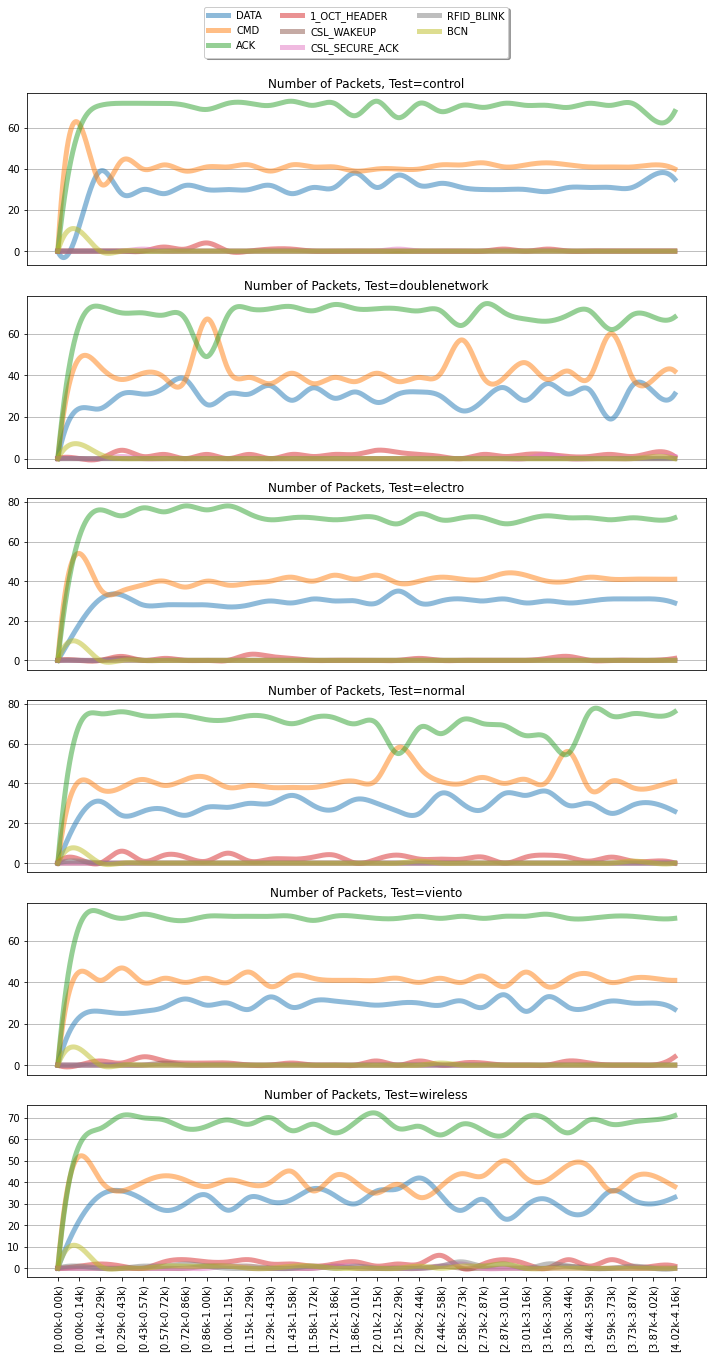

In [291]:
tests = list(db['TEST_TYPE'].unique())
frames = list(TYPES.keys())

figt = plt.figure( figsize=(10,18) )
rows = len(tests)
axes = figt.subplots(rows, 1)
bars = 30

for t in range(len(tests)):
    for f in range(len(frames)):
        df = db[(db['FRAME_TYPE'] == frames[f]) & (db['TEST_TYPE'] == tests[t])][['TIME(MS)', 'PCKT_NUM']]
        nums = list(df['PCKT_NUM'].values)
        times = list(df['TIME(MS)'].values)
        # from overall db
        x_vals = list(db['PCKT_NUM'].values)
        xs, intervals, heights, xlabels = bar_data(bars, nums, times, (0, min(ns)), False)
        axes[t].set_title(f'Number of Packets, Test={tests[t]}')
        if t == (len(tests)-1):
            axes[t].set_xticks(xs)
            axes[t].set_xticklabels(xlabels, rotation=90)
        else:
            axes[t].set_xticks([])
            axes[t].set_xticklabels([])
        lab = frames[f]
        if t > 0:
            lab = "_nolegend_"
        xnew = np.linspace(min(xs), max(xs), 5000) 
        spl = make_interp_spline(xs, heights, k=3)  # type: BSpline
        power_smooth = spl(xnew)
        axes[t].plot(xnew, power_smooth, color=colors2[f], label=lab, lw=5)
        axes[t].yaxis.grid(True)
        #axes[t].plot(np.array(xs) + (offset[f]), heights, color=colors[f], linestyle='-')
        #axes[t].bar(np.array(xs) + (offset[f]), heights, width=step, color=colors[f], label=lab)
        
figt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
figt.tight_layout()
plt.savefig(f"packets-per-test-ts.png", dpi=500)
plt.show()

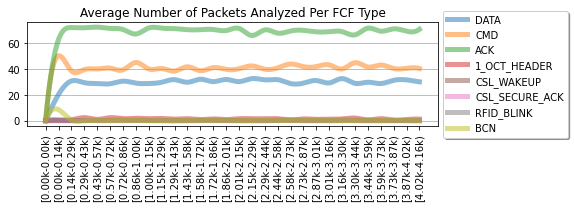

In [294]:
from scipy.interpolate import make_interp_spline, BSpline
from scipy.interpolate import interp1d

tests = list(db['TEST_TYPE'].unique())
frames = list(TYPES.keys())

figt = plt.figure( figsize=(7,3) )
rows = len(tests)
axes = figt.subplots(1, 1)
bars = 30


for f in range(len(frames)):
    nums = []
    times = []
    for t in range(len(tests)):
        df = db[(db['FRAME_TYPE'] == frames[f]) & (db['TEST_TYPE'] == tests[t])][['TIME(MS)', 'PCKT_NUM']]
        nums += list(df['PCKT_NUM'].values)
        times += list(df['TIME(MS)'].values)
        # from overall db
        x_vals = list(db['PCKT_NUM'].values)
    axes.set_xticks(xs)
    axes.set_xticklabels(xlabels, rotation=90)
    if t > 0:
        lab = "_nolegend_"
    xs, intervals, heights, xlabels = bar_data(bars, nums, times, (0, min(ns)), False, len(tests))
    axes.set_title(f'Average Number of Packets Analyzed Per FCF Type')
    xnew = np.linspace(min(xs), max(xs), 5000) 
    spl = make_interp_spline(xs, heights, k=3)  # type: BSpline
    power_smooth = spl(xnew)
    axes.plot(xnew, power_smooth, color=colors2[f], label=frames[f], lw=5)
    axes.yaxis.grid(True)
    
    #axes.plot(np.array(xs), heights, color=colors[f], linestyle='-', label=frames[f])
    #axes.bar(np.array(xs) + (offset[f]), heights, width=step, color=colors[f], label=frames[f])
        
box = axes.get_position()
axes.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
axes.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True)
figt.tight_layout()
plt.savefig(f"packets-ts-avg.png", dpi=500)
plt.show()